In [25]:
import glob
import os
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [26]:
ls -l

 Volume in drive C is Windows-SSD

File Not Found



 Volume Serial Number is 2070-7005

 Directory of C:\Users\gioma\Documents\GitHub\CNMAC_Dengue



In [27]:
# use glob to get all the csv files 
# in the folder
df= pd.read_csv('DEN_2015.csv', sep=';')

In [4]:
#Cantidad de Departamentos, Distritos y Provincias
df["Dep-Prov-Distrito"] = df["Departamento"] + ", " + df["Provincia"] + ", " + df["Distrito"]
df["Dep-Prov"] = df["Departamento"] + ", " + df["Provincia"]
print("La cantidad de departamentos es:", df['Departamento'].nunique())
print("La cantidad de distritos es:", df['Dep-Prov-Distrito'].nunique())
print("La cantidad de provincias es:", df['Dep-Prov'].nunique())

La cantidad de departamentos es: 18
La cantidad de distritos es: 230
La cantidad de provincias es: 65


In [5]:
df = df[['Dep-Prov-Distrito', 'Distrito', 'Semana', 'numero_casos','Casos', 'Año']] 

In [6]:
listaDistrito = df['Dep-Prov-Distrito'].tolist()
listaDistrito = list(dict.fromkeys(listaDistrito))
print('Son ', len(listaDistrito), ' distritos')
listaDistrito.sort()
print(listaDistrito)

Son  230  distritos
['AMAZONAS, BAGUA, BAGUA', 'AMAZONAS, BAGUA, IMAZA', 'AMAZONAS, CHACHAPOYAS, CHACHAPOYAS', 'AMAZONAS, CONDORCANQUI, NIEVA', 'AMAZONAS, CONDORCANQUI, RIO SANTIAGO', 'AMAZONAS, UTCUBAMBA, BAGUA GRANDE', 'AMAZONAS, UTCUBAMBA, CAJARURO', 'ANCASH, CASMA, CASMA', 'ANCASH, HUARMEY, HUARMEY', 'ANCASH, SANTA, CHIMBOTE', 'ANCASH, SANTA, NUEVO CHIMBOTE', 'AYACUCHO, HUAMANGA, AYACUCHO', 'AYACUCHO, HUANTA, LLOCHEGUA', 'AYACUCHO, HUANTA, SIVIA', 'AYACUCHO, LA MAR, ANCO', 'AYACUCHO, LA MAR, AYNA', 'AYACUCHO, LA MAR, SANTA ROSA', 'CAJAMARCA, CAJAMARCA, CAJAMARCA', 'CAJAMARCA, JAEN, BELLAVISTA', 'CAJAMARCA, JAEN, JAEN', 'CAJAMARCA, JAEN, SAN JOSE DEL ALTO', 'CAJAMARCA, SAN IGNACIO, CHIRINOS', 'CAJAMARCA, SAN IGNACIO, SAN IGNACIO', 'CAJAMARCA, SANTA CRUZ, NINABAMBA', 'CUSCO, LA CONVENCION, ECHARATE', 'CUSCO, LA CONVENCION, KIMBIRI', 'CUSCO, LA CONVENCION, PICHARI', 'CUSCO, LA CONVENCION, SANTA ANA', 'HUANUCO, AMBO, AMBO', 'HUANUCO, HUANUCO, AMARILIS', 'HUANUCO, HUANUCO, HUANUCO', 'HU

In [7]:
data=df.groupby('Distrito').agg({'Casos':'max'})


AMAZONAS, BAGUA, BAGUA
AMAZONAS, BAGUA, IMAZA
AMAZONAS, CHACHAPOYAS, CHACHAPOYAS
AMAZONAS, CONDORCANQUI, NIEVA
AMAZONAS, CONDORCANQUI, RIO SANTIAGO
AMAZONAS, UTCUBAMBA, BAGUA GRANDE
AMAZONAS, UTCUBAMBA, CAJARURO
ANCASH, CASMA, CASMA
ANCASH, HUARMEY, HUARMEY
ANCASH, SANTA, CHIMBOTE
ANCASH, SANTA, NUEVO CHIMBOTE
AYACUCHO, HUAMANGA, AYACUCHO
AYACUCHO, HUANTA, LLOCHEGUA
AYACUCHO, HUANTA, SIVIA
AYACUCHO, LA MAR, ANCO
AYACUCHO, LA MAR, AYNA
AYACUCHO, LA MAR, SANTA ROSA
CAJAMARCA, CAJAMARCA, CAJAMARCA
CAJAMARCA, JAEN, BELLAVISTA
CAJAMARCA, JAEN, JAEN
CAJAMARCA, JAEN, SAN JOSE DEL ALTO
CAJAMARCA, SAN IGNACIO, CHIRINOS
CAJAMARCA, SAN IGNACIO, SAN IGNACIO
CAJAMARCA, SANTA CRUZ, NINABAMBA
CUSCO, LA CONVENCION, ECHARATE
CUSCO, LA CONVENCION, KIMBIRI
CUSCO, LA CONVENCION, PICHARI
CUSCO, LA CONVENCION, SANTA ANA
HUANUCO, AMBO, AMBO
HUANUCO, HUANUCO, AMARILIS
HUANUCO, HUANUCO, HUANUCO
HUANUCO, LEONCIO PRADO, DANIEL ALOMIA ROBLES
HUANUCO, LEONCIO PRADO, HERMILIO VALDIZAN
HUANUCO, LEONCIO PRADO, JOSE C

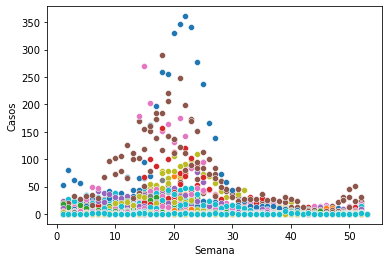

In [8]:
timeSeries = pd.DataFrame()
#listaDistrito = listaDistrito[0:15]
for dis in listaDistrito:
    distrito=df[df['Dep-Prov-Distrito']==dis]
    distrito.sort_values(['Semana'], ascending = True)
    distrito = distrito.reset_index(drop=True)
    distrito = distrito.replace('nan', np.nan).fillna(0.000001)
    distrito = distrito.replace([np.inf, -np.inf], np.nan).fillna(0.000001)
    timeSeries = timeSeries.append(distrito['Casos'])
    print(dis)
    ax = sns.scatterplot(y=distrito['Casos'], x= distrito['Semana'])
plt.show()

In [9]:
timeSeries.fillna(0.00001)

,0,1,2,3,4,5,6,7,8,9,...,43,44,45,46,47,48,49,50,51,52
Casos,1.0,1.0,1.0,1.0,3.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Casos,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Casos,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Casos,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Casos,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Casos,3.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Casos,4.0,4.0,3.0,2.0,1.0,2.0,0.0,0.0,0.0,0.0,...,1.0,1.0,2.0,3.0,2.0,2.0,5.0,1.0,4.0,6.0
Casos,3.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Casos,3.0,1.0,2.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Funciones de Medidas de Similaridad JV

In [10]:
import math
from math import sqrt, log, floor
from sklearn.metrics import mean_squared_error
from statistics import mean
from fastdtw import fastdtw
from scipy import stats
from scipy.spatial.distance import pdist

#Euclidean
def euclidean(x, y):
    r=np.linalg.norm(x-y)
    if math.isnan(r):
        r=1
    #print(r)
    return r

#Fast Dynamic time warping
def fast_DTW(x, y):
    r, _ = fastdtw(x, y, dist=euclidean)
    if math.isnan(r):
        r=1
    #print(r)
    return r

#Spearman
def scorr(x, y):
    r = stats.spearmanr(x, y)[0]
    if math.isnan(r):
        r=0
    #print(r)
    return 1 - r

#RMSE
def rmse(x, y):
    r=sqrt(mean_squared_error(x,y))
    if math.isnan(r):
        r=1
    #print(r)
    return r

def lcs(a, b):  
    lengths = [[0 for j in range(len(b)+1)] for i in range(len(a)+1)]
    # row 0 and column 0 are initialized to 0 already
    for i, x in enumerate(a):
        for j, y in enumerate(b):
            if x == y:
                lengths[i+1][j+1] = lengths[i][j] + 1
            else:
                lengths[i+1][j+1] = max(lengths[i+1][j], lengths[i][j+1])
    x, y = len(a), len(b)
    result = lengths[x][y]
    return result

def discretise(x):
    return int(x * 10)

def multidim_lcs(a, b):
    a = a.applymap(discretise)
    b = b.applymap(discretise)
    rows, dims = a.shape
    lcss = [lcs(a[i+2], b[i+2]) for i in range(dims)]
    return 1 - sum(lcss) / (rows * dims)

#Correlation
def corr(x, y):
    r=np.dot(x-mean(x),y-mean(y))/((np.linalg.norm(x-mean(x)))*(np.linalg.norm(y-mean(y))))
    if math.isnan(r):
        r=0
    #print(r)
    return 1 - r

In [11]:
n= timeSeries.shape[0]
n

230

In [17]:
timeSeries.shape

(230, 53)

## Distancias para K means

In [18]:
#Euclidean
euclidean_dist = np.zeros((n,n))
for i in range(0,n):
    #print("i",i)
    for j in range(0,n):
       # print("j",j)
        euclidean_dist[i,j] = euclidean(timeSeries.iloc[i].values.flatten(), timeSeries.iloc[j].values.flatten())

#DTW
dtw_dist = np.zeros((n,n))
for i in range(0,n):
    #print("i",i)
    for j in range(0,n):
       # print("j",j)
        dtw_dist[i,j] = fast_DTW(timeSeries.iloc[i].values.flatten(), timeSeries.iloc[j].values.flatten())
    

In [52]:
#RMSE
rmse_dist = np.zeros((n,n))
for i in range(0,n):
    #print("i",i)
    for j in range(0,n):
       # print("j",j)
        rmse_dist[i,j] = rmse(timeSeries.iloc[i].values.flatten(), timeSeries.iloc[j].values.flatten())
#Corr
corr_dist = np.zeros((n,n))
for i in range(0,n):
    #print("i",i)
    for j in range(0,n):
       # print("j",j)
        corr_dist[i,j] = corr(timeSeries.iloc[i].values.flatten(), timeSeries.iloc[j].values.flatten())
#scorr
scorr_dist = np.zeros((n,n))
for i in range(0,n):
    #print("i",i)
    for j in range(0,n):
       # print("j",j)
        scorr_dist[i,j] = scorr(timeSeries.iloc[i].values.flatten(), timeSeries.iloc[j].values.flatten())

In [19]:
from tslearn.metrics import dtw, soft_dtw
from tslearn.clustering import TimeSeriesKMeans
from tslearn.preprocessing import TimeSeriesScalerMeanVariance

model = TimeSeriesKMeans(n_clusters=6, metric="dtw", max_iter=10)
model.fit(timeSeries)



TimeSeriesKMeans(max_iter=10, metric='dtw', n_clusters=6)

In [38]:
from tslearn.clustering import TimeSeriesKMeans, KShape, KernelKMeans
from tslearn.preprocessing import TimeSeriesScalerMeanVariance

X = timeSeries.values
model2 = KShape(n_clusters=6, max_iter=10, n_init=2).fit(X)

In [39]:
df_cluster = pd.DataFrame(list(zip(timeSeries.columns, model.labels_)), columns=['metric', 'cluster'])



In [49]:
import random
def k_means_clust(data,num_clust,num_iter,w=5):
    centroids=random.sample(data,num_clust)
    counter=0
    for n in range(num_iter):
        counter+=1
        print(counter)
        assignments={}
        #assign data points to clusters
        for ind,i in enumerate(data):
            min_dist=float('inf')
            closest_clust=None
            for c_ind,j in enumerate(centroids):
                if LB_Keogh(i,j,5)<min_dist:
                    cur_dist=DTWDistance(i,j,w)
                    if cur_dist<min_dist:
                        min_dist=cur_dist
                        closest_clust=c_ind
            if closest_clust in assignments:
                assignments[closest_clust].append(ind)
            else:
                assignments[closest_clust]=[]
    
        #recalculate centroids of clusters
        for key in assignments:
            clust_sum=0
            for k in assignments[key]:
                clust_sum=clust_sum+data[k]
            centroids[key]=[m/len(assignments[key]) for m in clust_sum]
    
    return centroids

def LB_Keogh(s1,s2,r):
    LB_sum=0
    for ind,i in enumerate(s1):
        
        lower_bound=min(s2[(ind-r if ind-r>=0 else 0):(ind+r)])
        upper_bound=max(s2[(ind-r if ind-r>=0 else 0):(ind+r)])
        
        if i>upper_bound:
            LB_sum=LB_sum+(i-upper_bound)**2
        elif i<lower_bound:
            LB_sum=LB_sum+(i-lower_bound)**2
    
    return sqrt(LB_sum)

(50, 40, 1)
Euclidean k-means
16.434 --> 9.437 --> 9.437 --> 


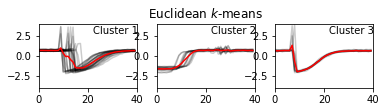

In [33]:
from tslearn.clustering import TimeSeriesKMeans
from tslearn.datasets import CachedDatasets
from tslearn.preprocessing import TimeSeriesScalerMeanVariance, TimeSeriesResampler

seed = 0
np.random.seed(seed)
X_train, y_train, X_test, y_test = CachedDatasets().load_dataset("Trace")
X_train = X_train[y_train < 4]  # Keep first 3 classes
np.random.shuffle(X_train)
# Keep only 50 time series
X_train = TimeSeriesScalerMeanVariance().fit_transform(X_train[:50])
# Make time series shorter
X_train = TimeSeriesResampler(sz=40).fit_transform(X_train)
sz = X_train.shape[1]

# Euclidean k-means
print(X_train.shape)
print("Euclidean k-means")
km = TimeSeriesKMeans(n_clusters=3, verbose=True, random_state=seed)
y_pred = km.fit_predict(X_train)

plt.figure()
for yi in range(3):
    plt.subplot(3, 3, yi + 1)
    for xx in X_train[y_pred == yi]:
        plt.plot(xx.ravel(), "k-", alpha=.2)
    plt.plot(km.cluster_centers_[yi].ravel(), "r-")
    plt.xlim(0, sz)
    plt.ylim(-4, 4)
    plt.text(0.55, 0.85,'Cluster %d' % (yi + 1),
             transform=plt.gca().transAxes)
    if yi == 1:
        plt.title("Euclidean $k$-means")

In [24]:
timeSeries_np

array([[1., 1., 1., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [3., 2., 0., ..., 0., 0., 0.],
       [3., 1., 2., ..., 0., 0., 0.],
       [1., 0., 0., ..., 1., 1., 5.]])

In [55]:
rmse_dist.shape

(230, 230)

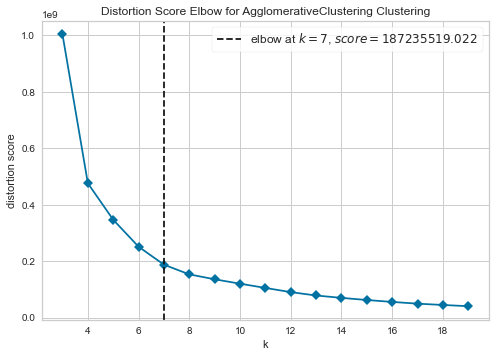

<AxesSubplot:title={'center':'Distortion Score Elbow for AgglomerativeClustering Clustering'}, xlabel='k', ylabel='distortion score'>

In [65]:
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
model = AgglomerativeClustering()
visualizer = KElbowVisualizer(model, k=(3,20),metric='distortion', timings=False)

visualizer.fit(dtw_dist)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

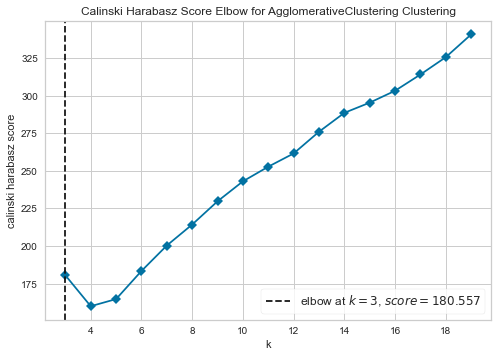

<AxesSubplot:title={'center':'Calinski Harabasz Score Elbow for AgglomerativeClustering Clustering'}, xlabel='k', ylabel='calinski harabasz score'>

In [70]:
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
model = AgglomerativeClustering()
visualizer = KElbowVisualizer(model, k=(3,20),metric='calinski_harabasz', timings=False)

visualizer.fit(timeSeries)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

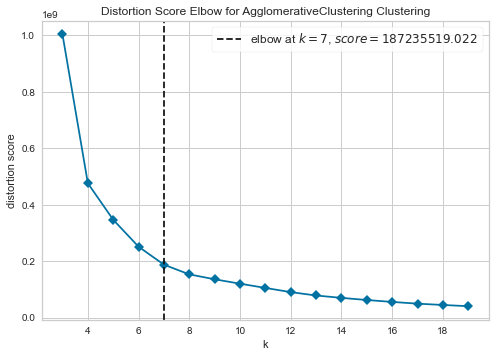

<AxesSubplot:title={'center':'Distortion Score Elbow for AgglomerativeClustering Clustering'}, xlabel='k', ylabel='distortion score'>

In [66]:
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
model = AgglomerativeClustering()
visualizer = KElbowVisualizer(model, k=(3,20),metric='distortion', timings=False)

visualizer.fit(dtw_dist)        # Fit the data to the visualizer
visualizer.poof()        # Finalize and render the figure

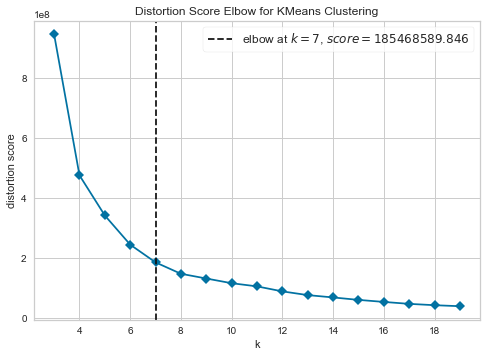

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [67]:
model = KMeans()
visualizer = KElbowVisualizer(model, k=(3,20),metric='distortion', timings=False)
#La metrica distortion comput la suma de cuadrado de las distancias de cada punto al centro, 
#pero se puede usar Silhouette o calinski_harabasz 
visualizer.fit(dtw_dist)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

In [64]:
clustering = DBSCAN(eps=0.5, min_samples=5, metric = "precomputed").fit(rmse_dist)
clustering.labels_

array([ 0,  0,  0,  0,  0, -1,  0, -1,  0,  0,  0,  0, -1, -1,  0, -1,  0,
        0, -1, -1,  0,  0,  0,  0,  0, -1, -1,  0,  0,  0,  0,  0,  0,  0,
        0,  0, -1,  0, -1,  0,  0, -1, -1, -1, -1,  0, -1, -1,  0,  0, -1,
       -1,  0, -1, -1, -1, -1,  0, -1, -1,  0, -1, -1, -1,  0,  0,  0,  0,
       -1,  0,  0, -1, -1, -1,  0, -1,  0,  0,  0,  0,  0, -1, -1,  0,  0,
        0,  0,  0,  0,  0, -1,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0, -1,
        0,  0, -1,  0,  0, -1, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,
       -1,  0, -1, -1,  0, -1, -1,  0,  0,  0,  0,  0,  0, -1, -1,  0,  0,
        0, -1, -1, -1, -1, -1, -1,  0, -1, -1, -1,  0, -1, -1, -1,  0, -1,
       -1, -1, -1, -1, -1,  0,  0, -1, -1, -1, -1,  0, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,
        0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0, -1,
        0,  0,  0, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
        0, -1,  0, -1,  0

In [14]:
k=6

# Juan Vicente

In [15]:
from sklearn.preprocessing import LabelEncoder
DIAMETER_METHODS = ['mean_cluster', 'farthest']
CLUSTER_DISTANCE_METHODS = ['nearest', 'farthest']

def inter_cluster_distances(labels, distances, method='nearest'):
    """Calculates the distances between the two nearest points of each cluster.
    :param labels: a list containing cluster labels for each of the n elements
    :param distances: an n x n numpy.array containing the pairwise distances between elements
    :param method: `nearest` for the distances between the two nearest points in each cluster, or `farthest`
    """
    if method not in CLUSTER_DISTANCE_METHODS:
        raise ValueError(
            'method must be one of {}'.format(CLUSTER_DISTANCE_METHODS))

    if method == 'nearest':
        return __cluster_distances_by_points(labels, distances)
    elif method == 'farthest':
        return __cluster_distances_by_points(labels, distances, farthest=True)


def __cluster_distances_by_points(labels, distances, farthest=False):
    n_unique_labels = len(np.unique(labels))
    cluster_distances = np.full((n_unique_labels, n_unique_labels),
                                float('inf') if not farthest else 0)

    np.fill_diagonal(cluster_distances, 0)

    for i in np.arange(0, len(labels) - 1):
        for ii in np.arange(i, len(labels)):
            if labels[i] != labels[ii] and (
                (not farthest and
                 distances[i, ii] < cluster_distances[labels[i], labels[ii]])
                    or
                (farthest and
                 distances[i, ii] > cluster_distances[labels[i], labels[ii]])):
                cluster_distances[labels[i], labels[ii]] = cluster_distances[
                    labels[ii], labels[i]] = distances[i, ii]
    return cluster_distances


def diameter(labels, distances, method='farthest'):
    """Calculates cluster diameters
    :param labels: a list containing cluster labels for each of the n elements
    :param distances: an n x n numpy.array containing the pairwise distances between elements
    :param method: either `mean_cluster` for the mean distance between all elements in each cluster, or `farthest` for the distance between the two points furthest from each other
    """
    if method not in DIAMETER_METHODS:
        raise ValueError('method must be one of {}'.format(DIAMETER_METHODS))

    n_clusters = len(np.unique(labels))
    diameters = np.zeros(n_clusters)

    if method == 'mean_cluster':
        for i in range(0, len(labels) - 1):
            for ii in range(i + 1, len(labels)):
                if labels[i] == labels[ii]:
                    diameters[labels[i]] += distances[i, ii]

        for i in range(len(diameters)):
            diameters[i] /= sum(labels == i)

    elif method == 'farthest':
        for i in range(0, len(labels) - 1):
            for ii in range(i + 1, len(labels)):
                if labels[i] == labels[ii] and distances[i, ii] > diameters[
                        labels[i]]:
                    diameters[labels[i]] = distances[i, ii]
    return diameters

def dunn(labels, distances, diameter_method='farthest',
         cdist_method='nearest'):
    """
    Dunn index for cluster validation (larger is better).
    
    .. math:: D = \\min_{i = 1 \\ldots n_c; j = i + 1\ldots n_c} \\left\\lbrace \\frac{d \\left( c_i,c_j \\right)}{\\max_{k = 1 \\ldots n_c} \\left(diam \\left(c_k \\right) \\right)} \\right\\rbrace
    
    where :math:`d(c_i,c_j)` represents the distance between
    clusters :math:`c_i` and :math:`c_j`, and :math:`diam(c_k)` is the diameter of cluster :math:`c_k`.
    Inter-cluster distance can be defined in many ways, such as the distance between cluster centroids or between their closest elements. Cluster diameter can be defined as the mean distance between all elements in the cluster, between all elements to the cluster centroid, or as the distance between the two furthest elements.
    The higher the value of the resulting Dunn index, the better the clustering
    result is considered, since higher values indicate that clusters are
    compact (small :math:`diam(c_k)`) and far apart (large :math:`d \\left( c_i,c_j \\right)`).
    :param labels: a list containing cluster labels for each of the n elements
    :param distances: an n x n numpy.array containing the pairwise distances between elements
    :param diameter_method: see :py:function:`diameter` `method` parameter
    :param cdist_method: see :py:function:`diameter` `method` parameter
    
    .. [Kovacs2005] Kovács, F., Legány, C., & Babos, A. (2005). Cluster validity measurement techniques. 6th International Symposium of Hungarian Researchers on Computational Intelligence.
    """

    labels = LabelEncoder().fit(labels).transform(labels)
    
    

    ic_distances = inter_cluster_distances(labels, distances, cdist_method)
    #print("IC",ic_distances)
    if len(ic_distances[ic_distances.nonzero()])==0:
        min_distance = 0
    else:
        min_distance = min(ic_distances[ic_distances.nonzero()])
    max_diameter = max(diameter(labels, distances, diameter_method))
    
    

    return min_distance / max_diameter

In [16]:
import scipy.cluster.hierarchy as hac
from scipy.cluster.hierarchy import fcluster
from sklearn.metrics import silhouette_score, calinski_harabasz_score

#Experimentos HAC
HAC_euc = AgglomerativeClustering(n_clusters=k).fit_predict(euclidean_dist)
silhouette_avg=silhouette_score( euclidean_dist, HAC_euc)
print("HAC + euclidian distance: ")
print("SC: ",silhouette_score( euclidean_dist, HAC_euc))
print("CHZ: ",calinski_harabasz_score(euclidean_dist, HAC_euc))
print("DUNN: ",dunn(HAC_euc, euclidean_dist, 'farthest', 'farthest'))
#HAC_rmse = AgglomerativeClustering(n_clusters=k).fit_predict(f_rmse_dist)
#print("HAC + rmse distance: ",silhouette_score( f_rmse_dist, HAC_rmse))
HAC_corr = AgglomerativeClustering(n_clusters=k).fit_predict(corr_dist)
print("HAC + corr distance: ")
print("SC: ",silhouette_score( corr_dist,HAC_corr))
print("CHZ: ",calinski_harabasz_score(corr_dist,HAC_corr))
print("DUNN: ",dunn(HAC_corr, corr_dist, 'farthest', 'farthest'))
#print("HAC + corr distance: ",0.0)
HAC_scorr = AgglomerativeClustering(n_clusters=k).fit_predict(scorr_dist)
print("HAC + scorr distance: ")
print("SC: ",silhouette_score( scorr_dist, HAC_scorr))
print("CHZ: ",calinski_harabasz_score(scorr_dist, HAC_scorr))
print("DUNN: ",dunn(HAC_scorr, scorr_dist, 'farthest', 'farthest'))
HAC_dtw = AgglomerativeClustering(n_clusters=k).fit_predict(dtw_dist)
print("HAC + dtw distance: ")
print("SC: ",silhouette_score( dtw_dist, HAC_dtw))
print("CHZ: ",calinski_harabasz_score(dtw_dist, HAC_dtw))
print("DUNN: ",dunn(HAC_dtw, dtw_dist, 'farthest', 'farthest'))

C:\ProgramData\Anaconda3\lib\site-packages\scipy\cluster\hierarchy.py:826: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  return linkage(y, method='ward', metric='euclidean')
C:\ProgramData\Anaconda3\lib\site-packages\scipy\cluster\hierarchy.py:826: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  return linkage(y, method='ward', metric='euclidean')


HAC + euclidian distance: 
SC:  0.7424266921330207
CHZ:  1888.3401733961807
DUNN:  0.10670453882733702
HAC + corr distance: 
SC:  0.33470649115513695
CHZ:  174.5741825811267
DUNN:  0.6714765484880186
HAC + scorr distance: 
SC:  0.40590274731591625
CHZ:  181.6144797711528
DUNN:  0.6690375924116059
HAC + dtw distance: 
SC:  0.6659566573136293
CHZ:  1580.9898388248027
DUNN:  0.12974683544303797


In [17]:
km_euc = KMeans(n_clusters=k).fit_predict(euclidean_dist)
silhouette_avg=silhouette_score( euclidean_dist, km_euc)
print("KM + euclidian distance: ")
print("SC: ",silhouette_score( euclidean_dist, km_euc))
print("CHZ: ",calinski_harabasz_score(euclidean_dist, km_euc))
print("DUNN: ",dunn(km_euc, euclidean_dist, 'farthest', 'farthest'))
#km_rmse = KMeans(n_clusters=k).fit_predict(rmse_dist)
#print("KM + rmse distance: ")
#print("SC: ",silhouette_score( rmse_dist, km_rmse))
#print("DUNN: ",base.dunn(km_rmse))
km_corr = KMeans(n_clusters=k).fit_predict(corr_dist)
print("KM + corr distance: ")
print("SC: ",silhouette_score( corr_dist, km_corr))
print("CHZ: ",calinski_harabasz_score(corr_dist, km_corr))
print("DUNN: ",dunn(km_corr, corr_dist, 'farthest', 'farthest'))
km_scorr = KMeans(n_clusters=k).fit_predict(scorr_dist)
print("KM + scorr distance: ")
print("SC: ",silhouette_score( scorr_dist, km_scorr))
print("CHZ: ",calinski_harabasz_score(scorr_dist, km_scorr))
print("DUNN: ",dunn(km_scorr, scorr_dist, 'farthest', 'farthest'))
km_dtw = KMeans(n_clusters=k).fit_predict(dtw_dist)
print("KM + dtw distance: ")
print("SC: ",silhouette_score( dtw_dist, km_dtw))
print("CHZ: ",calinski_harabasz_score(dtw_dist, km_dtw))
print("DUNN: ",dunn(km_dtw, dtw_dist, 'farthest', 'farthest'))

KM + euclidian distance: 
SC:  0.7575567484388063
CHZ:  2048.709470574308
DUNN:  0.10988974894158589
KM + corr distance: 
SC:  0.36497982179546345
CHZ:  191.16267789334475
DUNN:  0.7553168864234797
KM + scorr distance: 
SC:  0.46362687761031846
CHZ:  193.0781003117589
DUNN:  0.5867224188568814
KM + dtw distance: 
SC:  0.670049260432553
CHZ:  1592.5200675460271
DUNN:  0.1469258589511754


In [18]:
#Experimentos DBSCAN
DB_euc = DBSCAN(eps=3, min_samples=2).fit_predict(euclidean_dist)
silhouette_avg=silhouette_score( euclidean_dist, DB_euc)
print("DBSCAN + euclidian distance: ")
print("SC: ",silhouette_score( euclidean_dist, DB_euc))
print("CHZ: ",calinski_harabasz_score(euclidean_dist, DB_euc))
print("DUNN: ",dunn(DB_euc, euclidean_dist, 'farthest', 'farthest'))
#DB_rmse = DBSCAN(eps=12, min_samples=10).fit_predict(rmse_dist)
#print("DBSCAN + rmse distance: ",silhouette_score( rmse_dist, DB_rmse))
#print("DBSCAN + rmse distance: ",0.00000000)
DB_corr = DBSCAN(eps=3, min_samples=2).fit_predict(corr_dist)
#print("DBSCAN + corr distance: ")
#print("SC: ",silhouette_score( corr_dist, DB_corr))
#print("CHZ: ",calinski_harabasz_score(corr_dist, DB_corr))
#print("DUNN: ",dunn(DB_corr, corr_dist, 'farthest', 'farthest'))
DB_scorr = DBSCAN(eps=3, min_samples=2).fit_predict(scorr_dist)
print("DBSCAN + scorr distance: ")
print("SC: ",silhouette_score( scorr_dist, DB_scorr))
print("CHZ: ",calinski_harabasz_score(scorr_dist, DB_scorr))
print("DUNN: ",dunn(DB_scorr, scorr_dist, 'farthest', 'farthest'))
DB_dtw = DBSCAN(eps=3, min_samples=2).fit_predict(dtw_dist)
print("DBSCAN + dtw distance: ")
print("SC: ",silhouette_score( dtw_dist, DB_dtw))
print("CHZ: ",calinski_harabasz_score( dtw_dist, DB_dtw))
print("DUNN: ",dunn(DB_dtw, dtw_dist, 'farthest', 'farthest'))

DBSCAN + euclidian distance: 
SC:  -0.02498913972841527
CHZ:  1.1412917603251491
DUNN:  0.001047776615608531
DBSCAN + scorr distance: 
SC:  0.1742117844888843
CHZ:  60.921006493633776
DUNN:  0.5800096628011495
KM + dtw distance: 
SC:  -0.061887308314318996
CHZ:  1.0863572222221365
DUNN:  0.00026954177897574127


# Seleccionar columnas

In [19]:
colum_sel = ["Casos"]
cluster_data = df.loc[:, colum_sel]
cluster_data

,Casos
0,1
1,1
2,1
3,0
4,0
...,...
12185,0
12186,0
12187,0
12188,0


In [20]:
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, normalize
normalized_df = normalize(timeSeries)
normalized_df = pd.DataFrame(normalized_df)
normalized_df

,0,1,2,3,4,5,6,7,8,9,...,43,44,45,46,47,48,49,50,51,52
0,0.277350,0.277350,0.277350,0.277350,0.832050,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.577350,0.577350,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
225,0.866025,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.288675,0.288675,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
226,0.309529,0.309529,0.232147,0.154765,0.077382,0.154765,0.000000,0.000000,0.000000,0.000000,...,0.077382,0.077382,0.154765,0.232147,0.154765,0.154765,0.386912,0.077382,0.309529,0.464294
227,0.774597,0.516398,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
228,0.707107,0.235702,0.471405,0.235702,0.000000,0.000000,0.000000,0.000000,0.235702,0.235702,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


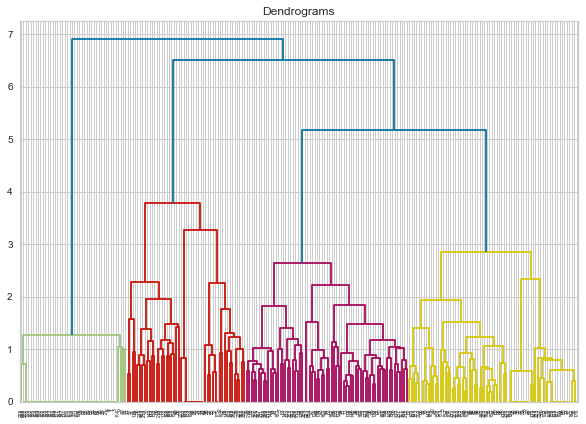

In [21]:
import scipy.cluster.hierarchy as shc
plt.figure(figsize=(10, 7))  
plt.title("CLusteríng Jerárquico")  
dend = shc.dendrogram(shc.linkage(normalized_df, method='ward'))

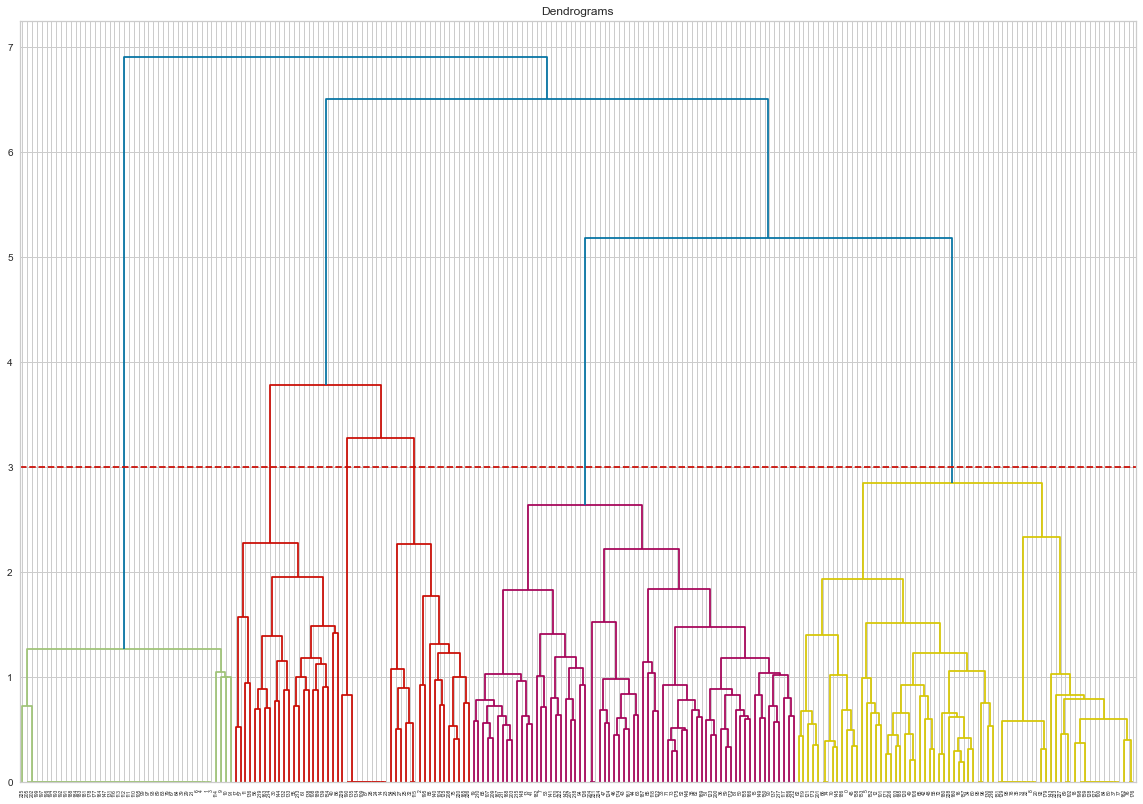

In [31]:
plt.figure(figsize=(20, 14))  
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(normalized_df, method='ward'))
plt.axhline(y=3, color='r', linestyle='--')

In [28]:
from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters=6, affinity='euclidean', linkage='ward')  
cluster.fit_predict(normalized_df)
plt.figure(figsize=(10, 7))  
plt.scatter(y=normalized_df, c=cluster.labels_) 

TypeError: scatter() missing 1 required positional argument: 'x'

<Figure size 720x504 with 0 Axes>

In [ ]:
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, normalize


normalized_df = pd.DataFrame(normalized_df, columns='')
clusters_range = range(2,15)
results = []
for c in clusters_range:
        clusterer = KMeans(init='k-means++', n_clusters=c, n_init=100, random_state=0)
        cluster_labels = clusterer.fit_predict(normalized_df)
        silhouette_avg = silhouette_score(normalized_df, cluster_labels)
        results.append([c,silhouette_avg])

result = pd.Dataframe(results, columns=["n_clusters", "sulhouette_score"])
pivot_km = pd.pivot_table(result, index = "n_clusters", values = "silhouette_score")

plt.figure()
sns.heatmap(pivot_km, annot=True, linewidth=.5, fmt='.3f', cmap= sns.rocket_r)
plt.tight_layout()


In [ ]:
kmeans_sel = KMeans(init='k-means++', n_clusters=6, n_init=100, random_state=1).fit(df_2)
labels = pd.Dataframe(kmeans_sel.leabels_)
clustered_data = cluster_dara.assign(Cluster=labels)

In [ ]:
scatters(clustered_data, h='Cluster')

# GIO

In [ ]:
from tslearn.metrics import dtw
dtw_score = dtw(x, y)
soft_dtw_score = soft_dtw(x, y, gamma=.1)

In [24]:
from tslearn.clustering import TimeSeriesKMeans
model = TimeSeriesKMeans(n_clusters=6, metric="dtw", max_iter=10, random_state=4)
model.fit(timeSeries.T)

TimeSeriesKMeans(max_iter=10, metric='dtw', n_clusters=6)

In [26]:
model.cluster_centers_.shape

(6, 230, 1)